Troy Morgan  
Week 10 Independent Lab  
BGEN 632, Graduate Introduction to Python  
Submitted 5/3/25  

Independent Lab: Decision Trees

# Setup

In [7]:
# Import modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [9]:
# set working directory
os.chdir("\\Users\\troyb\\Documents\\GitHub\\week10labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\troyb\\Documents\\GitHub\\week10labs\\data'

In [11]:
# Load data and inspect
Cali_Hospital_df = pd.read_table('calihospital.txt')
Cali_Hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [13]:
# Remove hospital ID and personnel information. 
CH_df_1 = Cali_Hospital_df.drop(['HospitalID', 'Name', 'Zip', 'Website', 'Work_ID', 'LastName', 'FirstName', 'Gender', 'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate'], axis = 1)
CH_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TypeControl  61 non-null     object 
 1   Teaching     61 non-null     object 
 2   DonorType    61 non-null     object 
 3   NoFTE        61 non-null     float64
 4   NetPatRev    61 non-null     float64
 5   InOperExp    61 non-null     float64
 6   OutOperExp   61 non-null     float64
 7   OperRev      61 non-null     int64  
 8   OperInc      61 non-null     int64  
 9   AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 4.9+ KB


In [15]:
#This is the same thing I had to do in the Instructor-Led lab. I don't know if it's right, but it seems to make
#SOMETHING work. 

# Encode TypeControl to numeric labels
le_teaching = LabelEncoder()
le_typecontrol = LabelEncoder()
le_donortype = LabelEncoder()

# Encode columns in-place or to new columns
CH_df_1['Teaching'] = le_teaching.fit_transform(CH_df_1['Teaching'])
CH_df_1['TypeControl'] = le_typecontrol.fit_transform(CH_df_1['TypeControl'])
CH_df_1['DonorType'] = le_donortype.fit_transform(CH_df_1['DonorType'])

CH_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TypeControl  61 non-null     int32  
 1   Teaching     61 non-null     int32  
 2   DonorType    61 non-null     int32  
 3   NoFTE        61 non-null     float64
 4   NetPatRev    61 non-null     float64
 5   InOperExp    61 non-null     float64
 6   OutOperExp   61 non-null     float64
 7   OperRev      61 non-null     int64  
 8   OperInc      61 non-null     int64  
 9   AvlBeds      61 non-null     int64  
dtypes: float64(4), int32(3), int64(3)
memory usage: 4.2 KB


In [17]:
# Variables of interest. "Have at least one categorical predictor and one numerical predictor. 
#In total, have at least three predictors per model." 
CH_df_1_trees = CH_df_1[['Teaching', 'NoFTE', 'AvlBeds']]

Got it! ...finally.  

I doesn't seem to me that this was at all clear from the tutorial.  

BUT, after tons of errors, a long time staring at it, and a few beers, I figured it out! 

At least, I figured something out, because...

WE'VE GOT TREES!!!  

<div><center><img src = "assets/james-gunn-baby-groot-dance.jpg"></center></div>

# Classification Trees and Regression Trees

## Using `operating income` as a target variable, create a tree.

Let's create a few!

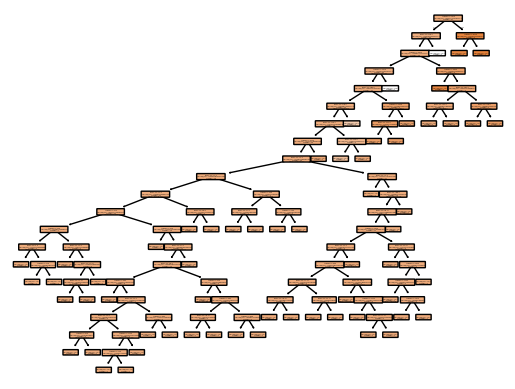

In [22]:
#Regression tree - crappy, impossible to read version.
tree_model_2 = tree.DecisionTreeRegressor().fit(CH_df_1_trees, CH_df_1.OperInc)

col_names = list(CH_df_1_trees.columns.values)

tree.plot_tree(tree_model_2, feature_names=col_names, filled=True, rounded=True)

plt.show()

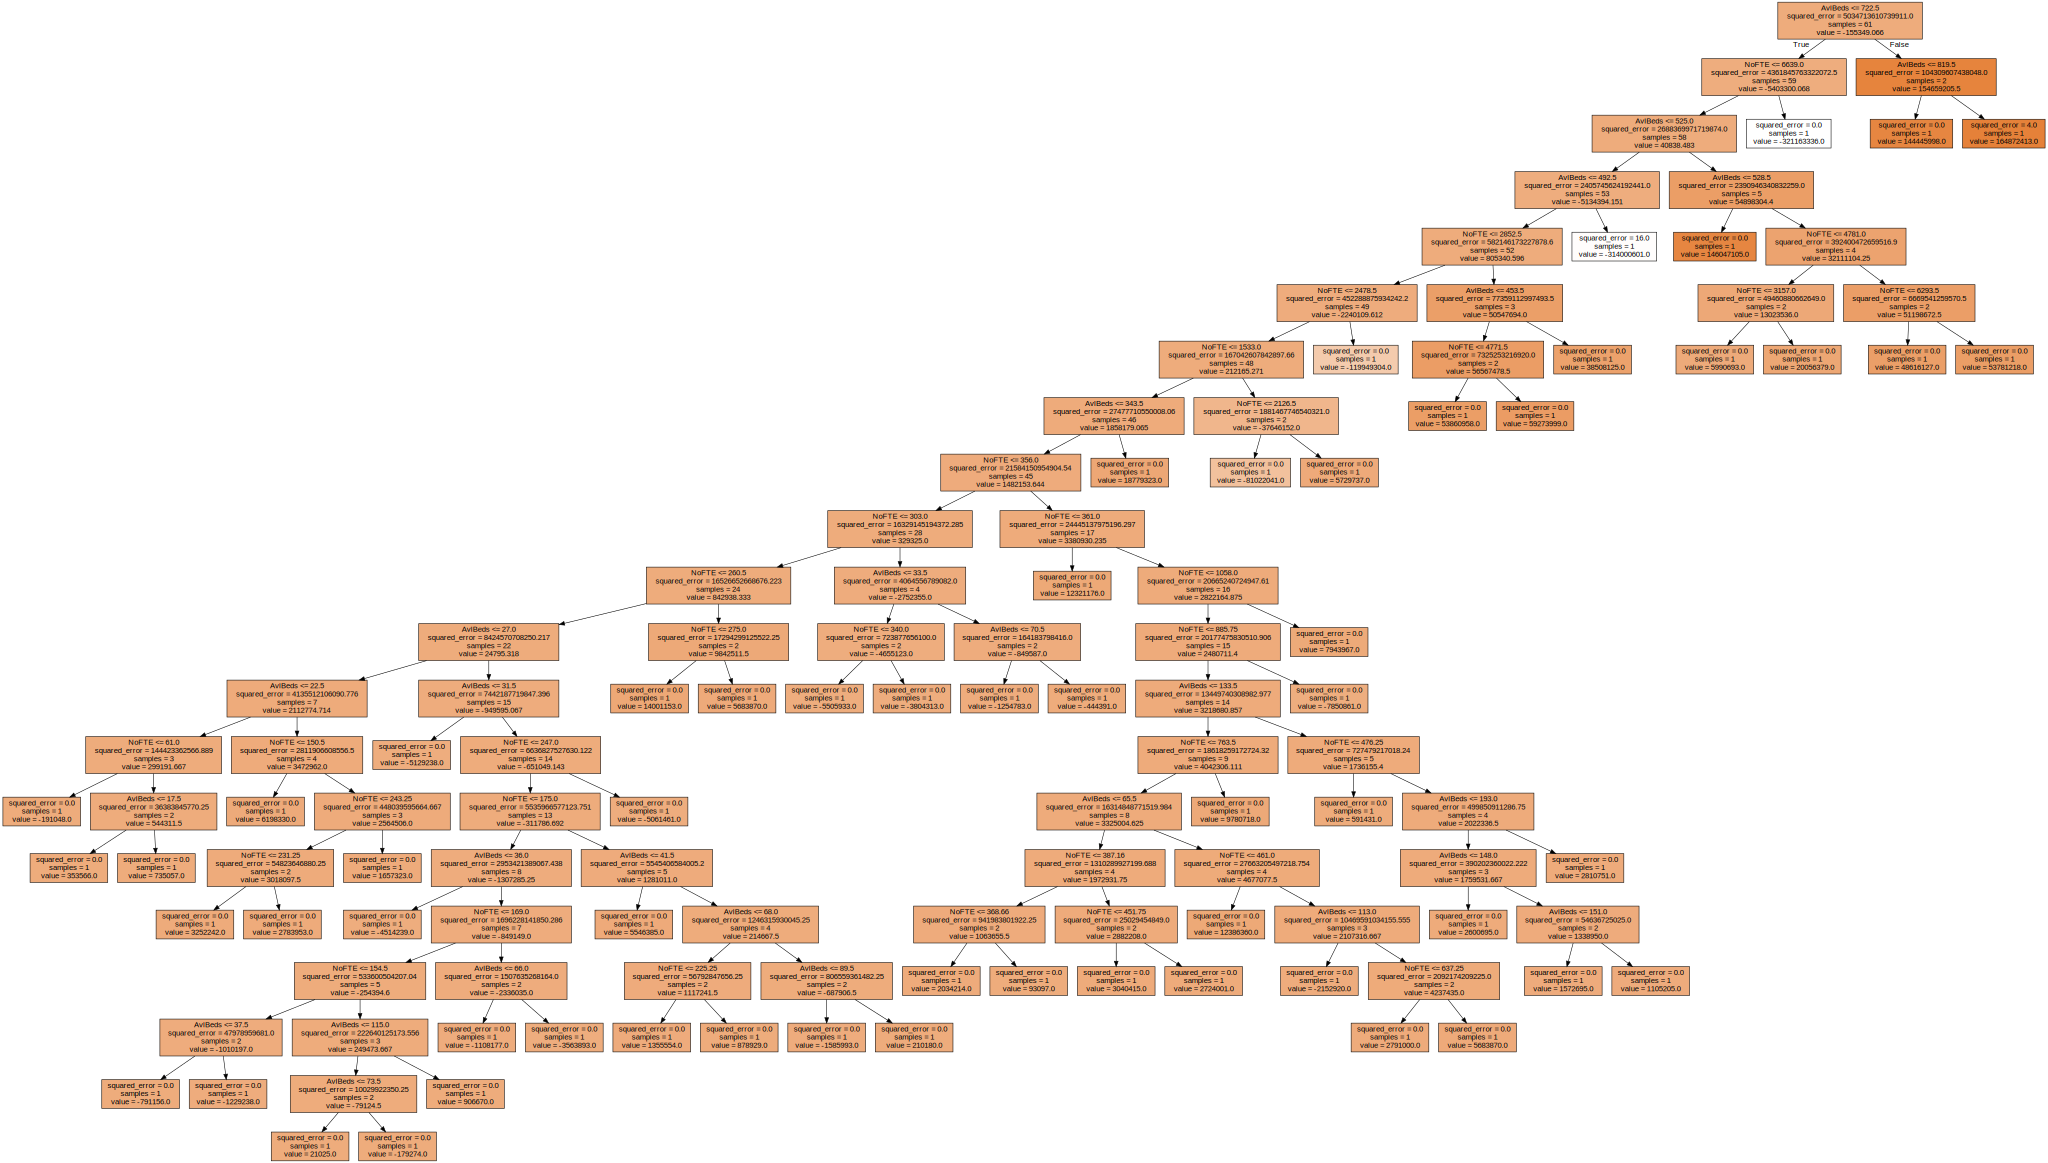

In [24]:
#That same regression tree - less crappy, still hard to read version. Graphviz for the win!
#It was difficult to get Graphviz working. But, again, I finally did it! TREES!!!
tree_mod_graph = export_graphviz(tree_model_2, filled=True, feature_names=col_names)
graph = graphviz.Source(tree_mod_graph, format="png")  # or "svg" for better resolution
display(graph)

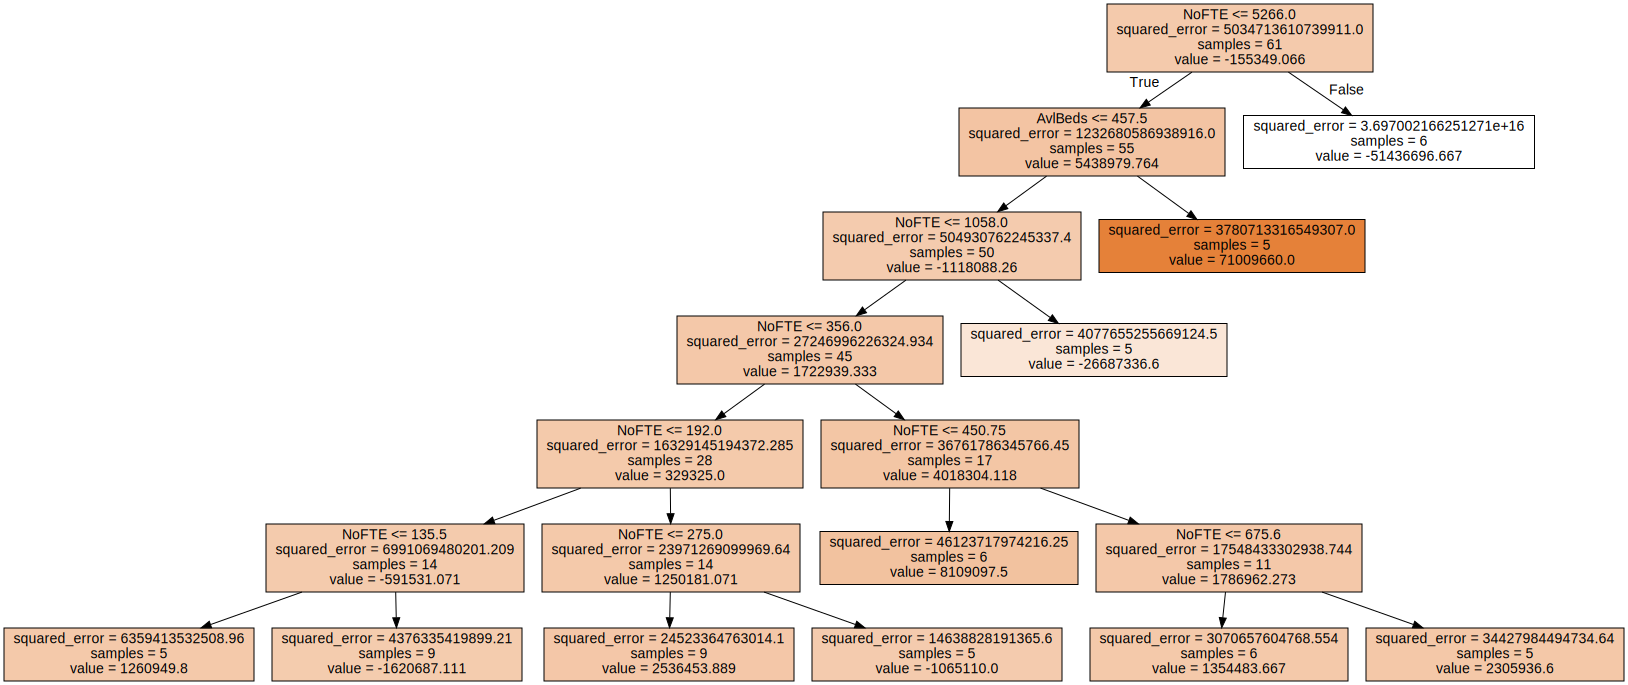

In [26]:
# Ok, let's use the min_samples_split and min_samples_leaf technique here. That looked nice, right?

# create model
tree_model_2 = tree.DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=5)
tree_model_2.fit(CH_df_1_trees, CH_df_1.OperInc)

# visualize tree with graphviz
tree_mod_graph = export_graphviz(tree_model_2, filled=True, feature_names=col_names)
graph = graphviz.Source(tree_mod_graph, format="svg") # or "svg" for better resolution
display(graph)

Neat!

## Using `operating revenue` as a target variable, create a tree.

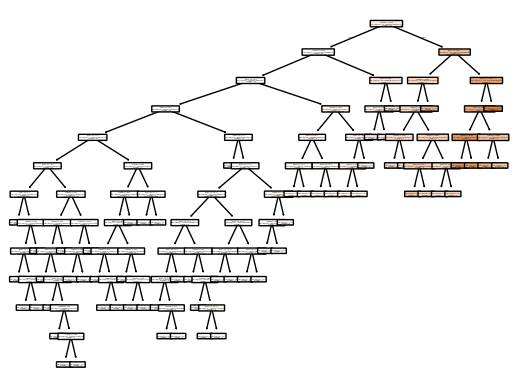

In [30]:
#Regression tree - crappy, impossible to read version.
tree_model_3 = tree.DecisionTreeRegressor().fit(CH_df_1_trees, CH_df_1.OperRev)

col_names = list(CH_df_1_trees.columns.values)

tree.plot_tree(tree_model_3, feature_names=col_names, filled=True, rounded=True)

plt.show()

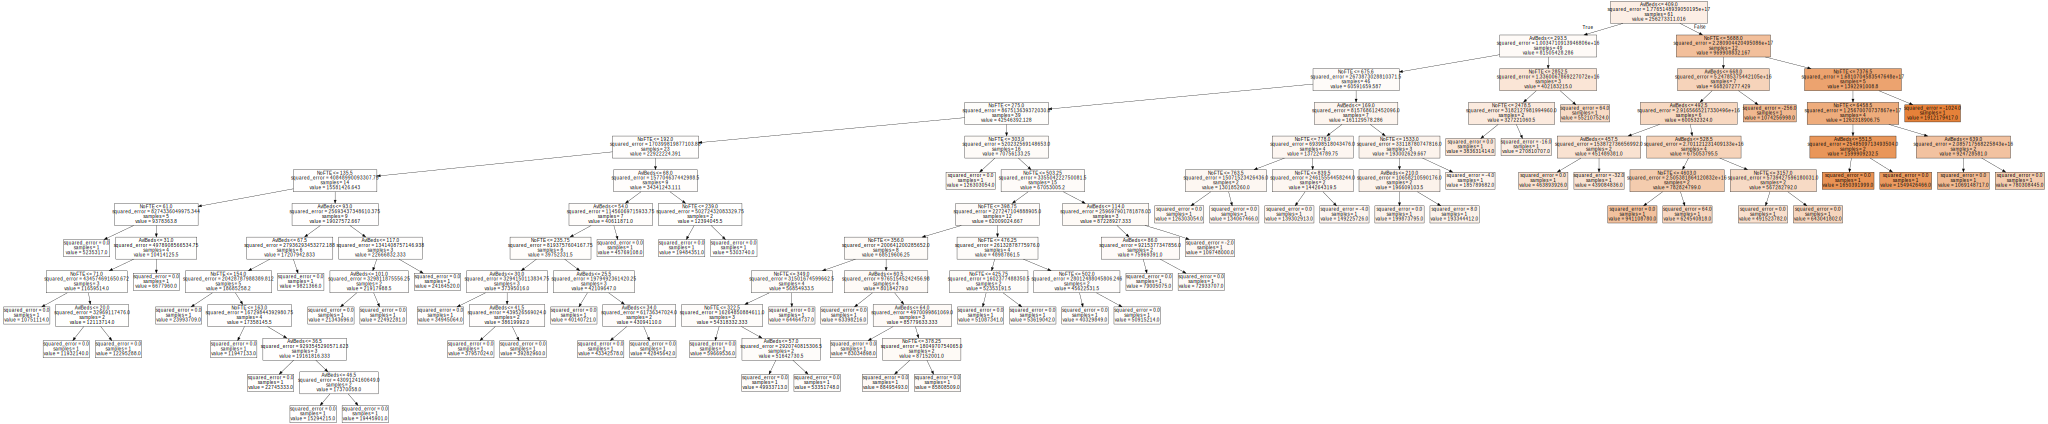

In [32]:
#That same regression tree - less crappy, still hard to read version. 
tree_mod_graph = export_graphviz(tree_model_3, filled=True, feature_names=col_names)
graph = graphviz.Source(tree_mod_graph, format="svg")  # or "svg" for better resolution
display(graph)

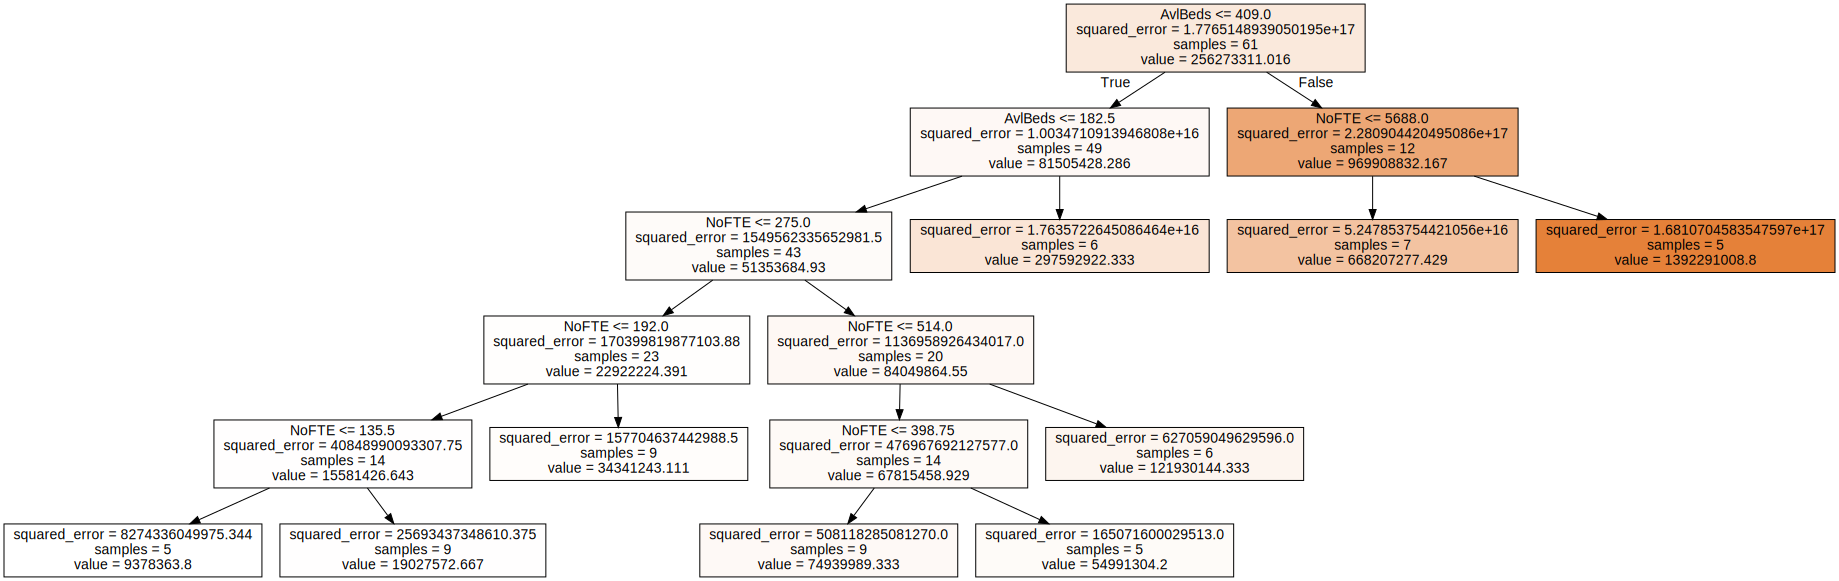

In [34]:
# The min_samples_split and min_samples_leaf technique again.
# Much better!

# create model
tree_model_3 = tree.DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=5)
tree_model_3.fit(CH_df_1_trees, CH_df_1.OperRev)

# visualize tree with graphviz
tree_mod_graph = export_graphviz(tree_model_3, filled=True, feature_names=col_names)
graph = graphviz.Source(tree_mod_graph, format="svg") # or "svg" for better resolution
display(graph)

## Using `TypeControl` as a target variable, create a tree

In [78]:
# Drop columns we don't need from original dataframe again. 
# I kept getting errors here, and figured that it was becuase of the encoding I did earlier, so let's start over...
CH_df_2 = Cali_Hospital_df.drop(['HospitalID', 'Name', 'Zip', 'Website', 'Work_ID', 'LastName', 'FirstName', 'Gender', 'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate'], axis = 1)
CH_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TypeControl  61 non-null     object 
 1   Teaching     61 non-null     object 
 2   DonorType    61 non-null     object 
 3   NoFTE        61 non-null     float64
 4   NetPatRev    61 non-null     float64
 5   InOperExp    61 non-null     float64
 6   OutOperExp   61 non-null     float64
 7   OperRev      61 non-null     int64  
 8   OperInc      61 non-null     int64  
 9   AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 4.9+ KB


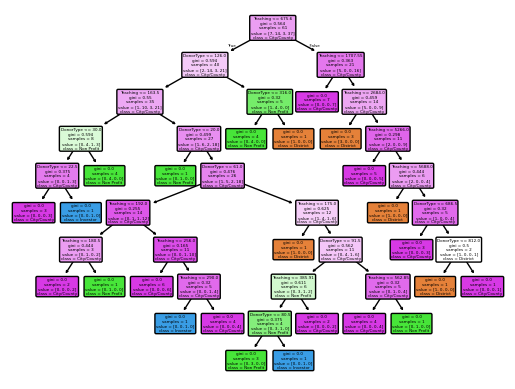

In [90]:
# Classification tree - crappy and impossible to read version.

# get labels
col_names = list(CH_df_2.columns.values)
cls_names = list(CH_df_2.TypeControl.unique())

# use one-hot encode for categorical variables
onehot_data = pd.get_dummies(CH_df_2[['Teaching', 'NoFTE', 'AvlBeds']], drop_first=True)

# fit model
tree_model_4 = tree.DecisionTreeClassifier().fit(onehot_data, CH_df_2.TypeControl)

# visualize tree
tree.plot_tree(tree_model_4, feature_names=col_names[1:8], class_names=cls_names, filled=True, rounded=True)
plt.show()

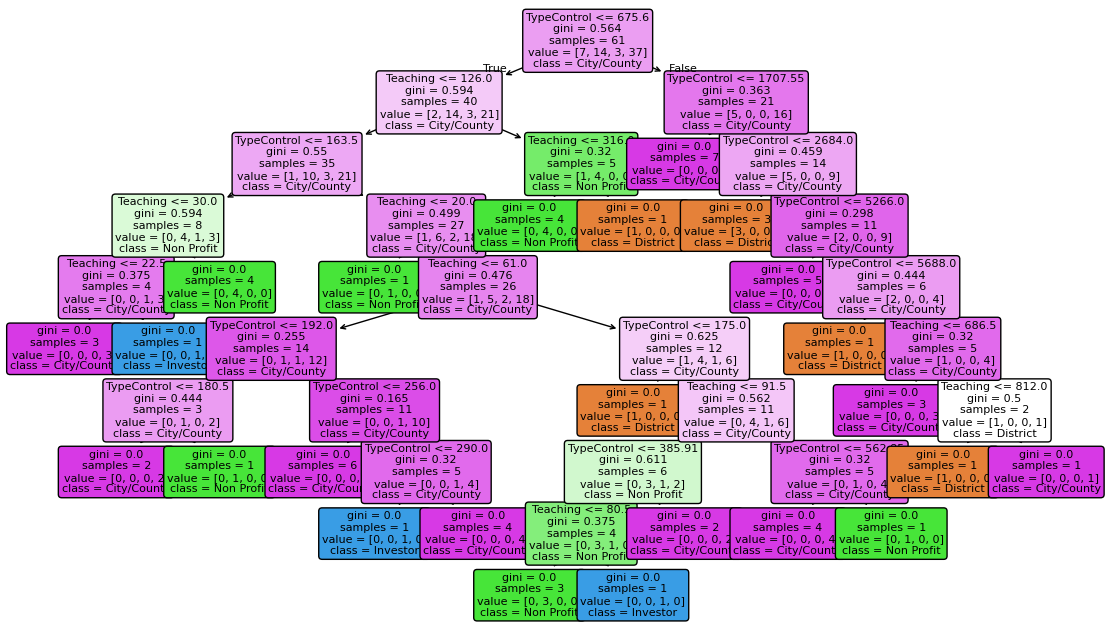

In [96]:
#That same classification tree - easier to read version. 

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_4,
                feature_names=col_names,
                class_names=cls_names,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

## Using `DonorType` as a target variable, create a tree

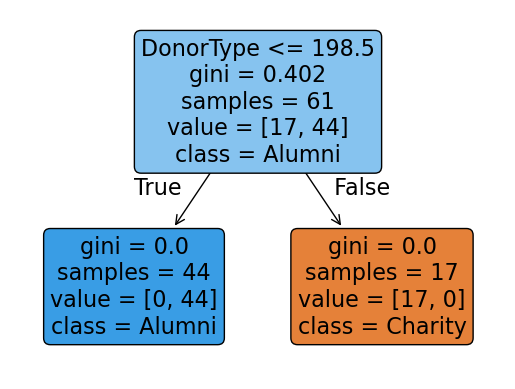

In [83]:
# Classification tree - BIG boxes version

# get labels
col_names = list(CH_df_2.columns.values)
cls_names = list(CH_df_2.DonorType.unique())

# use one-hot encode for categorical variables
onehot_data = pd.get_dummies(CH_df_2[['Teaching', 'NoFTE', 'AvlBeds']], drop_first=True)

# fit model
tree_model_5 = tree.DecisionTreeClassifier().fit(onehot_data, CH_df_2.DonorType)

# visualize tree
tree.plot_tree(tree_model_5, feature_names=col_names[1:8], class_names=cls_names, filled=True, rounded=True)
plt.show()

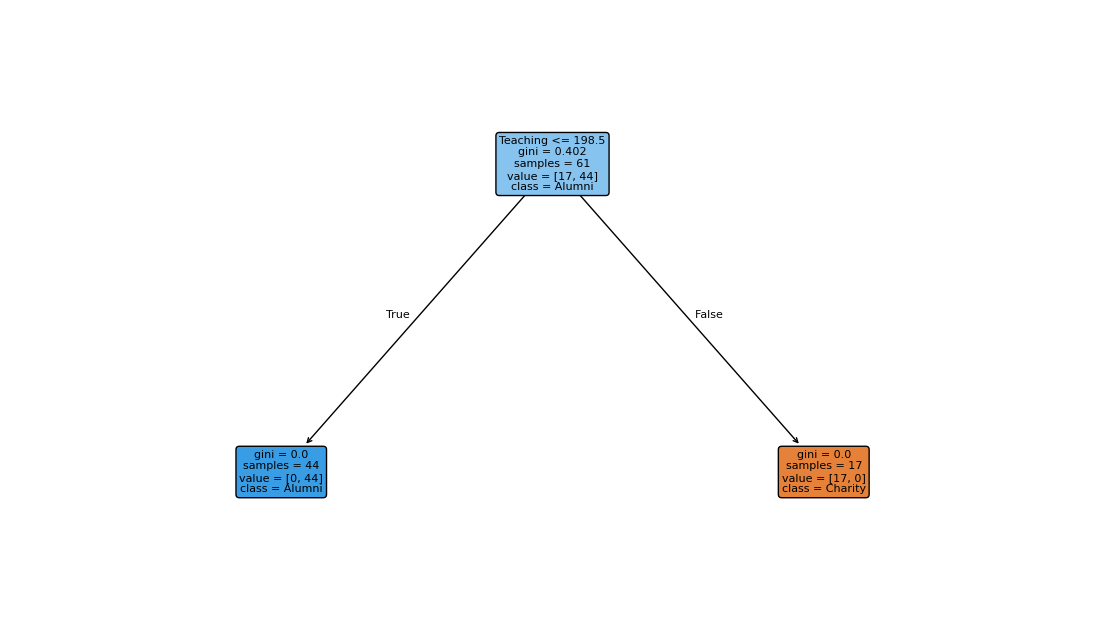

In [85]:
#That same classification tree - loooong arrows version. 

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_5,
                feature_names=col_names,
                class_names=cls_names,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

# Interpret your findings for these trees. Explain why you think the splits you received make sense.
* Which of these trees would you choose as your best model? Justify your position.

Honestly, I have no idea. I cannot make sense of any of them. As you said in the tutorial "We have covered a lot of information in this tutorial." It also seems to presuppose a lot of prior statistical and conceptual knowledge. This is something I would like to gain, but I don't think it's something that I will gain in this Introduction to Python course. 

I do not know which of these trees I would choose as the best model. There is not enough instruction in the tutorial at a level that I am able to understand for me to even make a guess. The only guess I can make is based on my presumption that the number of available beds in a hospital would be a determining factor in the amount operating revenue that could be generated. So, that one?

What I have been able to do, though, is figure out how to follow the coding instructions you've given and plug in values where appropriate to a least get something that is not an error. That's worth something, right?

I hope I still pass this course. This is my last assignment submission before receiving the MPA next week. I've enjoyed this class immensely, and I am still thinking I might take BGEN 516 with you in the fall. Thank you much!

# References

This is the same ChatGPT exchange I used in the instructor-led lab.  

<div><center><img src = "assets/confustion_matrix_error.png"></center></div>  